In [1]:
import torch
import torch.nn as nn
from torch import optim
import torchvision
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_V2_Weights, fasterrcnn_resnet50_fpn_v2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.models.vgg import VGG13_BN_Weights

In [2]:
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights = weights)

device = next(model.parameters()).device
print(device)

cpu


1. LambdaLR

state_dict: {'state': {}, 'param_groups': [{'lr': 0.0, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0.0005, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'initial_lr': 0.001, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}]}
Ini

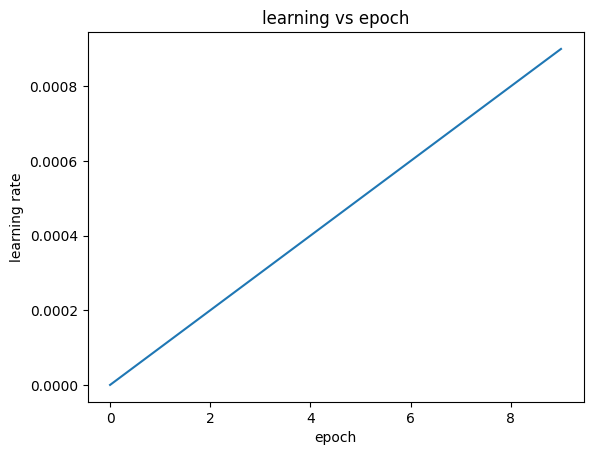

In [3]:
params = [p for p in model.parameters() if p.requires_grad]
lambda1 = lambda epoch: epoch / 10
optimizer = torch.optim.SGD(params, lr = 0.001, momentum = 0.9, weight_decay = 0.0005)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda1)

print(f'state_dict: {optimizer.state_dict()}')
print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(10):
    print('epoch = {}, learning rate = {:.4f}'.format(epoch, optimizer.state_dict()['param_groups'][0]['lr']))
    lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
    optimizer.step()
    scheduler.step()

plt.title("learning vs epoch")
plt.xlabel("epoch")
plt.ylabel("learning rate")
plt.plot(lr)

state_dict: {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0.0005, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'initial_lr': 0.1, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}]}
Initi

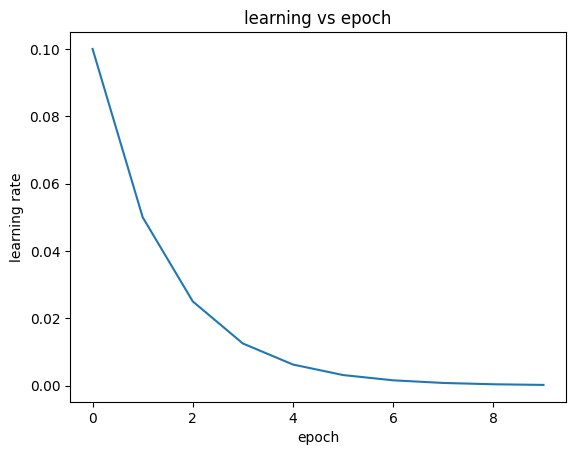

In [4]:
params = [p for p in model.parameters() if p.requires_grad]
lambda1 = lambda epoch: 0.50
optimizer = torch.optim.SGD(params, lr = 0.1, momentum = 0.9, weight_decay = 0.0005)
scheduler = optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda = lambda1)

print(f'state_dict: {optimizer.state_dict()}')
print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(10):
    print('epoch = {}, learning rate = {:.4f}'.format(epoch, optimizer.state_dict()['param_groups'][0]['lr']))
    lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
    optimizer.step()
    scheduler.step()

plt.title("learning vs epoch")
plt.xlabel("epoch")
plt.ylabel("learning rate")
plt.plot(lr)

2. StepLR

state_dict: {'state': {}, 'param_groups': [{'lr': 0.0001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0.0005, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'initial_lr': 0.0001, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}]}

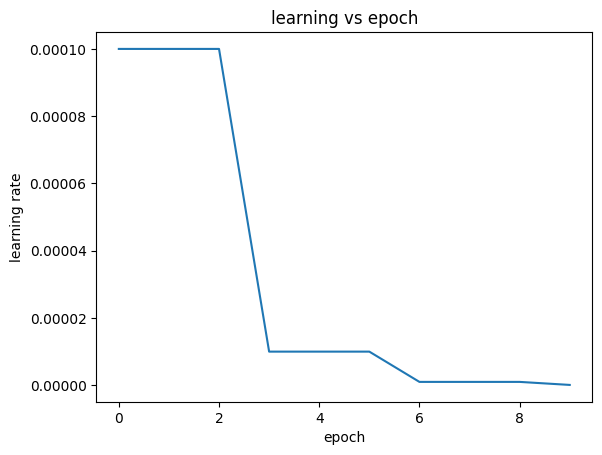

In [5]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr = 0.0001, momentum = 0.9, weight_decay = 0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 3, gamma = 0.1)

print(f'state_dict: {optimizer.state_dict()}')
print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(10):
    print('epoch = {}, learning rate = {:.4f}'.format(epoch, optimizer.state_dict()['param_groups'][0]['lr']))
    lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
    optimizer.step()
    scheduler.step()

plt.title("learning vs epoch")
plt.xlabel("epoch")
plt.ylabel("learning rate")
plt.plot(lr)

state_dict: {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0.0005, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'initial_lr': 0.1, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}]}
Initi

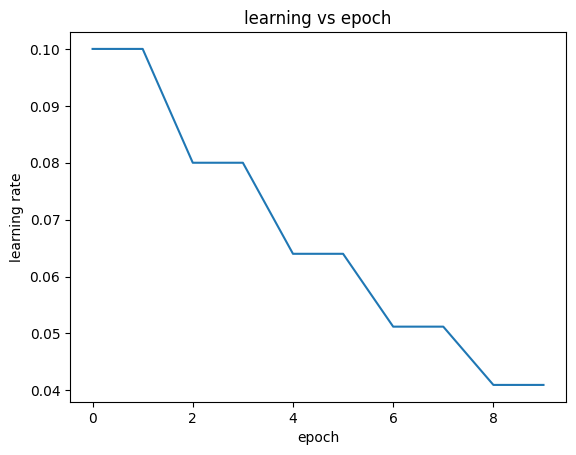

In [6]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr = 0.1, momentum = 0.9, weight_decay = 0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 2, gamma = 0.8)

print(f'state_dict: {optimizer.state_dict()}')
print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(10):
    print('epoch = {}, learning rate = {:.4f}'.format(epoch, optimizer.state_dict()['param_groups'][0]['lr']))
    lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
    optimizer.step()
    scheduler.step()

plt.title("learning vs epoch")
plt.xlabel("epoch")
plt.ylabel("learning rate")
plt.plot(lr)

3. MultiStepLR

state_dict: {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0.0005, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'initial_lr': 0.1, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}]}
Initi

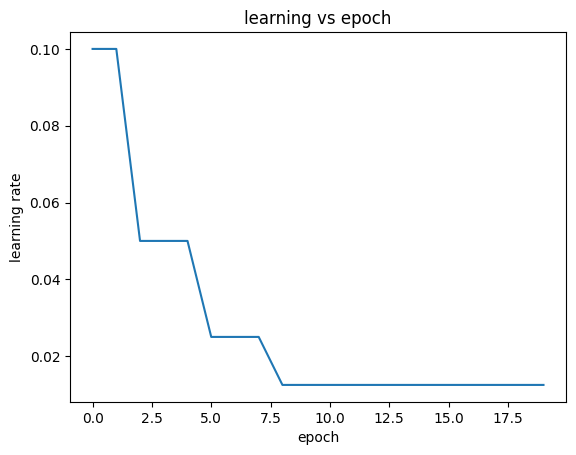

In [7]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr = 0.1, momentum = 0.9, weight_decay = 0.0005)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones = [2, 5, 8], gamma = 0.5)

print(f'state_dict: {optimizer.state_dict()}')
print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(20):
    print('epoch = {}, learning rate = {:.4f}'.format(epoch, optimizer.state_dict()['param_groups'][0]['lr']))
    lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
    optimizer.step()
    scheduler.step()

plt.title("learning vs epoch")
plt.xlabel("epoch")
plt.ylabel("learning rate")
plt.plot(lr)

4. ExponentialLR

state_dict: {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0.0005, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'initial_lr': 0.1, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}]}
Initi

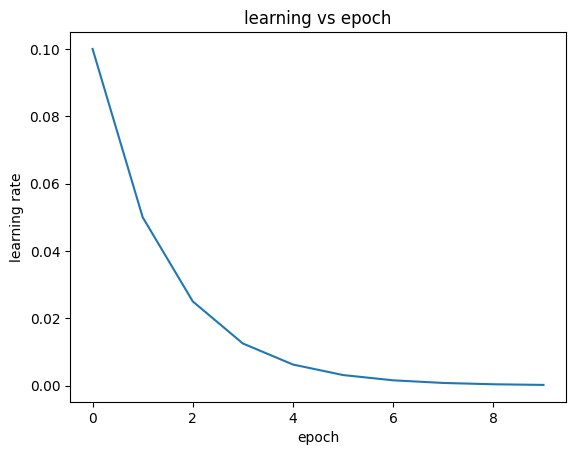

In [8]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr = 0.1, momentum = 0.9, weight_decay = 0.0005)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.5)

print(f'state_dict: {optimizer.state_dict()}')
print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(10):
    print('epoch = {}, learning rate = {:.4f}'.format(epoch, optimizer.state_dict()['param_groups'][0]['lr']))
    lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
    optimizer.step()
    scheduler.step()

plt.title("learning vs epoch")
plt.xlabel("epoch")
plt.ylabel("learning rate")
plt.plot(lr)

5. CosineAnnealingLR

state_dict: {'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0.0005, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'initial_lr': 0.1, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}]}
Initi

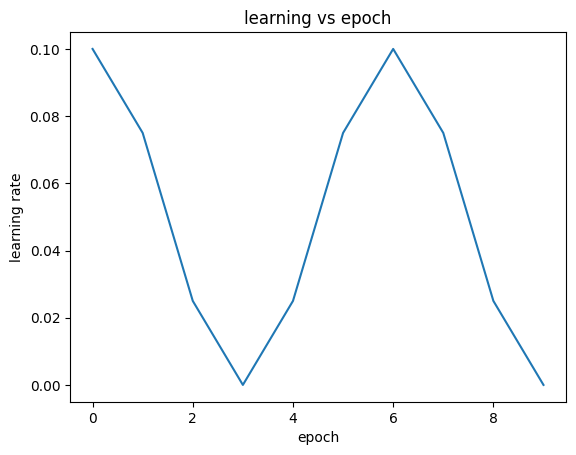

In [9]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr = 0.1, momentum = 0.9, weight_decay = 0.0005)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = 3)

print(f'state_dict: {optimizer.state_dict()}')
print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(10):
    print('epoch = {}, learning rate = {:.4f}'.format(epoch, optimizer.state_dict()['param_groups'][0]['lr']))
    lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
    optimizer.step()
    scheduler.step()

plt.title("learning vs epoch")
plt.xlabel("epoch")
plt.ylabel("learning rate")
plt.plot(lr)

6. ReduceLROnPlateau

`ReduceLROnPlateau` is a learning rate scheduler that reduce the learning rate when a certain metric (like validation loss or accuracy) stops improving. The idea is that when the model's learning plateaus, decreasing the learning rate can help the model make finer adjustments and potentially improve further.

Here's how it works:

Monitor a specified metric each epoch during training.
If the metric stops improving for a number of epochs specified by patience, reduce the learning rate.
The learning rate is reduced by multiplying it with a factor (usually between 0.1 and 0.01).
The reduction of learning rate continues with each period of stagnation, until it reaches a specified min_lr.
This strategy is often beneficial in practice, as it allows the model to make large updates when learning is fast in the initial stages, and smaller, finer updates when learning slows down.

The `mode` argument in the `ReduceLROnPlateau` scheduler determines whether the learning rate should be reduced when a certain metric stops improving. If `mode = 'min'`, the scheduler will reduce the learning rate when the specified metric stops decreasing; this is typically used when the metric in question is something like validation loss, which want to minimize. On the other hand, if `mode = 'max'`, the scheduler will reduce the learning rate when the specified metric stops increasing; this is typically used when the metric in question is something like accuracy, which want to maximize. So, if set `mode = 'max'` in the code, the learning rate will be reduced when the accuracy (or whatever metric that are monitoring) stops increasing for a specified number of epochs (`patience`).

In [10]:
# load dataset and set transformation
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor()
])

train_data = torchvision.datasets.KMNIST(
    'data', train = True, download = True, transform = transform
)
valid_data = torchvision.datasets.KMNIST(
    'data', train = False, download = True, transform = transform
)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = 32, num_workers = 5)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = 32, num_workers = 5)

In [11]:
# load the pre-trained VGG13 model with batch normalization
classification_model = torchvision.models.vgg13_bn(weights = VGG13_BN_Weights.DEFAULT)

# freeze the parameters of the pre-trained model to prevent them from being updated during training
for param in classification_model.parameters():
    param.requires_grad = False

# define new input channel
# change in_channels from 3 to 1 (RGB to grayscale)
new_input_channel = nn.Conv2d(1, 64, kernel_size = (3, 3), stride = (1, 1), padding = (1, 1))

# define a new classifier
# change out_features from 1000 to 10 (10 classess)
classifier = nn.Sequential(
    nn.Linear(in_features = 25088, out_features = 4096, bias = True),
    nn.ReLU(inplace = True),
    nn.Dropout(p = 0.5, inplace = False),
    nn.Linear(in_features = 4096, out_features = 4096, bias = True),
    nn.ReLU(inplace = True),
    nn.Dropout(p = 0.5, inplace = False),
    nn.Linear(in_features = 4096, out_features = 10, bias = True)
)

classification_model.features[0] = new_input_channel
classification_model.classifier = classifier

classification_model

VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [12]:
# check if the parameters are frozen
for name, p in classification_model.named_parameters():
    print(f"{name}: {p.requires_grad}")

features.0.weight: True
features.0.bias: True
features.1.weight: False
features.1.bias: False
features.3.weight: False
features.3.bias: False
features.4.weight: False
features.4.bias: False
features.7.weight: False
features.7.bias: False
features.8.weight: False
features.8.bias: False
features.10.weight: False
features.10.bias: False
features.11.weight: False
features.11.bias: False
features.14.weight: False
features.14.bias: False
features.15.weight: False
features.15.bias: False
features.17.weight: False
features.17.bias: False
features.18.weight: False
features.18.bias: False
features.21.weight: False
features.21.bias: False
features.22.weight: False
features.22.bias: False
features.24.weight: False
features.24.bias: False
features.25.weight: False
features.25.bias: False
features.28.weight: False
features.28.bias: False
features.29.weight: False
features.29.bias: False
features.31.weight: False
features.31.bias: False
features.32.weight: False
features.32.bias: False
classifier.0.w

cpu
cuda:0
Initial learning rate: 0.1
epoch = 0, learning rate = 0.1000
train loss: 138250.49924468994, val loss: 23051.20153427124
epoch = 1, learning rate = 0.1000
train loss: 138261.93453979492, val loss: 23047.767318725586
epoch = 2, learning rate = 0.1000
train loss: 138247.19092559814, val loss: 23036.689880371094
epoch = 3, learning rate = 0.1000
train loss: 138251.23169708252, val loss: 23054.28643798828
epoch = 4, learning rate = 0.1000
train loss: 138262.08004760742, val loss: 23050.037506103516
epoch = 5, learning rate = 0.1000
train loss: 138264.81230926514, val loss: 23048.94554901123
epoch = 6, learning rate = 0.0200
train loss: 138250.1869506836, val loss: 23041.967491149902
epoch = 7, learning rate = 0.0200
train loss: 138260.6930847168, val loss: 23055.087661743164
epoch = 8, learning rate = 0.0200
train loss: 138249.53241729736, val loss: 23058.338821411133
epoch = 9, learning rate = 0.0040
train loss: 138261.6569519043, val loss: 23050.31280517578


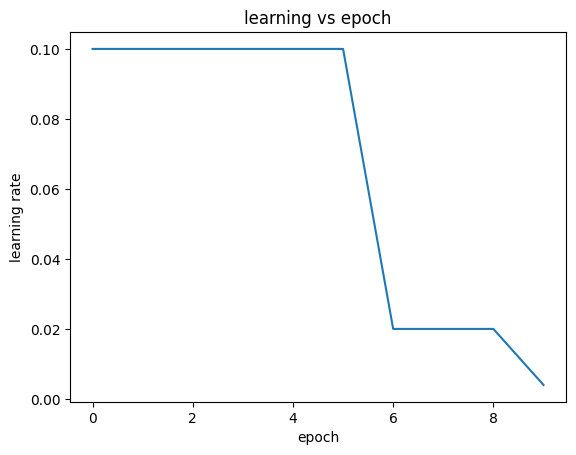

In [13]:
device = next(classification_model.parameters()).device
print(device)

classification_model.cuda()
device = next(classification_model.parameters()).device
print(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.1, momentum = 0, weight_decay = 0)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode = 'min', factor = 0.2, patience = 2, min_lr = 0.001
)

print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(10):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    
    for i,(data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = classification_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    
    model.eval()
    
    with torch.no_grad():
        print('epoch = {}, learning rate = {:.4f}'.format(epoch, optimizer.state_dict()['param_groups'][0]['lr']))
        lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
        for i, (data, target) in enumerate(valid_loader):
            data, target = data.cuda(), target.cuda()
            output = classification_model(data)
            loss = criterion(output, target)
            valid_loss += loss.item() * data.size(0)

        scheduler.step(valid_loss)
    
    print(f"train loss: {train_loss}, val loss: {valid_loss}")
    
plt.title("learning vs epoch")
plt.xlabel("epoch")
plt.ylabel("learning rate")    
plt.plot(lr)

CyclicLR

Initial learning rate: 0.001


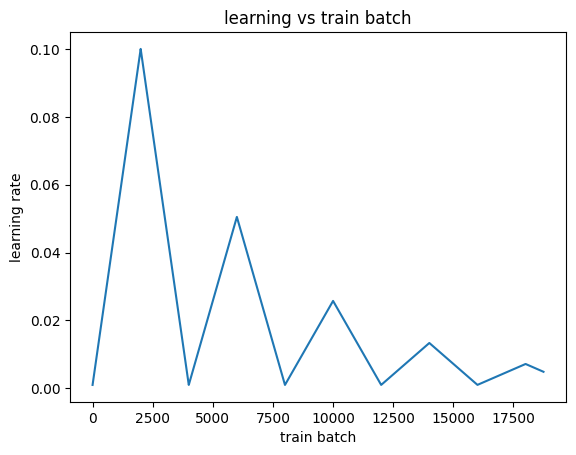

In [14]:
optimizer = optim.SGD(model.parameters(), lr = 0.1, momentum = 0.9, weight_decay = 0.0005)
scheduler = optim.lr_scheduler.CyclicLR(
    optimizer, base_lr = 0.001, max_lr = 0.1, mode = 'triangular2'
)

print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(10):
    for i,(data, target) in enumerate(train_loader):
        lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
        optimizer.step()
        scheduler.step()

plt.title("learning vs train batch")
plt.xlabel("train batch")
plt.ylabel("learning rate")    
plt.plot(lr)

Initial learning rate: 0.001


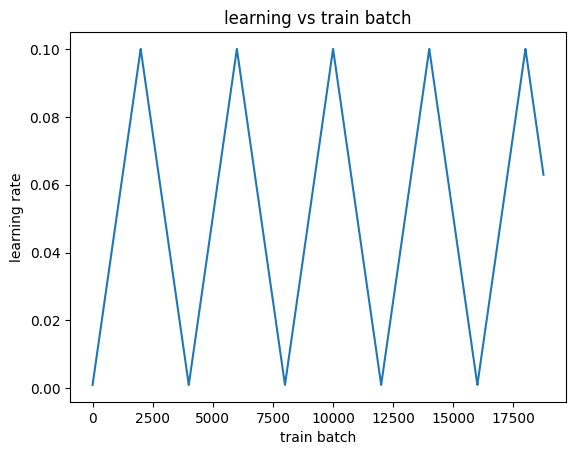

In [16]:
optimizer = optim.SGD(model.parameters(), lr = 0.1, momentum = 0.9, weight_decay = 0.0005)
scheduler = optim.lr_scheduler.CyclicLR(
    optimizer, base_lr = 0.001, max_lr = 0.1, mode = 'triangular'
)

print('Initial learning rate: {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))

lr = []

for epoch in range(10):
    for i,(data, target) in enumerate(train_loader):
        lr.append(optimizer.state_dict()['param_groups'][0]['lr'])
        optimizer.step()
        scheduler.step()

plt.title("learning vs train batch")
plt.xlabel("train batch")
plt.ylabel("learning rate")    
plt.plot(lr)
plt.show()